<a href="https://colab.research.google.com/github/lijovi/speechrecog/blob/main/LatihanQuiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydub
from pydub import AudioSegment
import soundfile as sf
from IPython.display import Audio, display
import librosa
import wave

In [16]:
import numpy as np
AUDIO_PATH = './sample.wav'
audio = sf.read(AUDIO_PATH)
base_audio = AudioSegment.from_wav(AUDIO_PATH)
data, sr = librosa.load(AUDIO_PATH)

def ivolume(angka):
  audio = base_audio + angka
  return audio

def ipitch(angka):
  audio = librosa.effects.pitch_shift(data, sr=sr, n_steps=angka)
  return audio

def ifadein(angka):
  audio = base_audio.fade_in(angka)
  return audio

def ifadeout(angka):
  audio = base_audio.fade_out(angka)
  return audio

def timestretch(angka):
  audio = librosa.effects.time_stretch(data, rate=angka)
  return audio

def whitenoise(frames, noise_factor):
  noise = np.random.normal(0, frames.std(), frames.size)
  return frames + (noise*noise_factor)

# white_noise = whitenoise(data, 0.005)
# display(Audio(white_noise, rate = sr))

def randomgain(frames, min, max):
  gain = np.random.uniform(min, max)
  return frames*gain

random_gain = randomgain(data,1,100)
display(Audio(random_gain, rate = sr))
# frames  = data


In [3]:
import torchaudio
import torch

bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H

labels = bundle.get_labels()
model = bundle.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth
100%|██████████| 360M/360M [00:06<00:00, 56.4MB/s]


In [4]:
SPEECH = './speech.wav'
waveform, sr = torchaudio.load(SPEECH)

In [5]:
with torch.inference_mode():
  emission, _ = model(waveform)

In [6]:
class GreedyCTCDecoder(torch.nn.Module):
  def __init__(self,labels):
    super().__init__()
    self.labels = labels
    self.blank = 0

  def forward(self, emission:torch.Tensor)->str :
    indices = torch.argmax(emission, dim=-1)
    indices = torch.unique_consecutive(indices, dim =-1)
    indices = [i for i in indices if i != self.blank]
    # return ''.join([self.labels[i] for i in indices])
    hasil =  ''.join([self.labels[i] for i in indices])
    hasil = hasil.replace('|', ' ')
    return hasil

In [7]:
decoder = GreedyCTCDecoder(labels = bundle.get_labels())
text = decoder(emission[0])

In [8]:
def menu():
  print('1. Audio Augmentation')
  print('2. Predict Text')
  print('3. Exit')

menuU = '0'
menu1 = '0'
pitch = '0'

while menuU != 3:
  menu()
  menuU = input('Input Menu Number')
  if menuU=='1':
    while menu1 != 5:
      print('1. Increase or decrease volume')
      print('2. Increase or decrease pitch')
      print('3. Insert fade in effect')
      print('4. Insert fade out effect')
      print('5. Back to main menu')
      menu1 = input('Input number')
      if menu1 == '1':
        volume = int(input('Input Volume dB'))
        while volume < -10000 or volume > 100:
          volume = int(input('Input Volume dB'))
        hasil = ivolume(volume)
        filename = input('Input File Name')
        while filename.endswith('.wav') != True:
          filename = input('Input File Name')
        hasil.export(filename)

      elif menu1 == '2':
        pitch = int(input('Input Pitch Rate'))
        while pitch <-10 or pitch > 10:
          pitch = int(input("Input Pitch Rate"))
        hasil = ipitch(pitch)
        filename = input('Input File Name')
        while filename.endswith('.wav') != True:
          filename = input('Input File Name')
        wave.open(filename, 'w')

      elif menu1 == '3':
        fadein = int(input('Input Duration Effect'))
        while fadein < 0:
          fadein = int(input('Input Duration Effect'))
        hasil = ifadein(fadein)
        filename = input('Input File Name')
        while filename.endswith('.wav') != True:
          filename = input('Input File Name')
        hasil.export(filename)

      elif menu1 == '4':
        fadeout = int(input('Input Duration Effect'))
        while fadeout < 0:
          fadeout = int(input('Input Duration Effect'))
        hasil = ifadeout(fadeout)
        filename = input('Input File Name')
        while filename.endswith('.wav') != True:
          filename = input('Input File Name')
        hasil.export(filename)

      elif menu1 == '5' or '0':
        break

  elif menuU == '2':
    print(text)
  elif menuU == '3':
    print('Thankyou')
    break


1. Audio Augmentation
2. Predict Text
3. Exit
Input Menu Number1
1. Increase or decrease volume
2. Increase or decrease pitch
3. Insert fade in effect
4. Insert fade out effect
5. Back to main menu
Input number3
Input Duration Effect10
Input File Namefadein.wav
1. Increase or decrease volume
2. Increase or decrease pitch
3. Insert fade in effect
4. Insert fade out effect
5. Back to main menu
Input number4
Input Duration Effect10
Input File Namefadeout.wav
1. Increase or decrease volume
2. Increase or decrease pitch
3. Insert fade in effect
4. Insert fade out effect
5. Back to main menu
Input number5
1. Audio Augmentation
2. Predict Text
3. Exit
Input Menu Number3
Thankyou


In [9]:
fadein = './fadein.wav'
fadeout = './fadeout.wav'

display(Audio(fadeout))

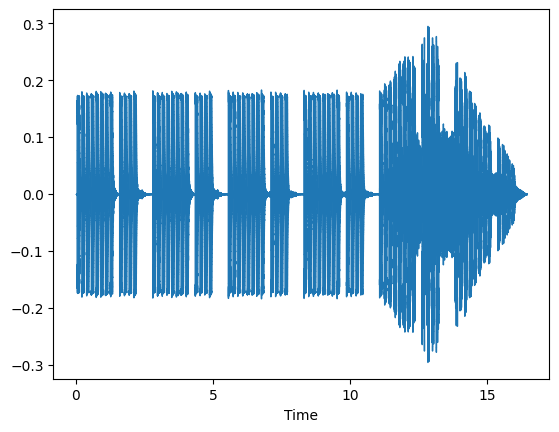

In [11]:
librosa.display.waveshow(data, sr=sr)